# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [76]:
# imports
## I'd run into a 'TypeError' that many in the class were affected by. After spending some time researching, I found it to be a compatibility issue between numpy and pandas, likely from recent updates made to the environments. I've included the code to install them below just as a reference, as well as print() functions to check the installed versions.
##!pip install numpy==1.16.5 --user
##!pip install pandas==0.25.3 --user

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [77]:
print(f'numpy v{np.__version__} is currently installed.')
print(f'pandas v{pd.__version__} is currently installed.')
print(f'panel v{pn.__version__} is currently installed.')

numpy v1.16.5 is currently installed.
pandas v0.25.3 is currently installed.
panel v0.11.3 is currently installed.


In [78]:
# Read the Mapbox API key
load_dotenv('token.env')
map_box_api = os.getenv("mapbox")

## Load Data

In [79]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [80]:
# Calculate the mean number of housing units per year (hint: use groupby)
sfo_data = sfo_data.rename(
    columns={
        'neighborhood':'Neighborhood',
        'sale_price_sqr_foot':'Sale Price/SqFt',
        'housing_units':'Housing Units',
        'gross_rent':'Gross Rent'
    }
).rename_axis('Year').fillna(0).astype({'Sale Price/SqFt': int})

## Checked for nulls and filled with 0
# print(sfo_data.isna().sum())
# print(sfo_data.dtypes)

print(sfo_data.head())
print()

avg_housingUnits = sfo_data.groupby('Year')['Housing Units'].mean().to_frame()
avg_housingUnits

          Neighborhood  Sale Price/SqFt  Housing Units  Gross Rent
Year                                                              
2010      Alamo Square              291         372560        1239
2010        Anza Vista              267         372560        1239
2010           Bayview              170         372560        1239
2010  Buena Vista Park              347         372560        1239
2010  Central Richmond              319         372560        1239



,Housing Units
Year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [81]:
# Save the dataframe as a csv file
avg_housingUnits.to_csv('average_units_per_year.csv', sep=',', header=['Avg. Housing Units'])

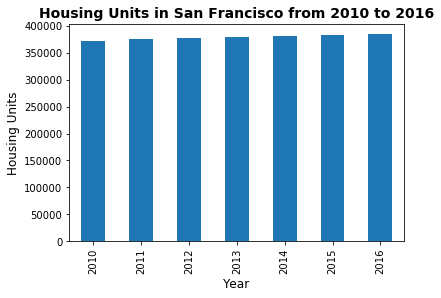

In [82]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
plot_avg_housingUnits = avg_housingUnits.plot(kind='bar', legend=False)

plot_avg_housingUnits.set_xlabel('Year', fontsize=12)
plot_avg_housingUnits.set_ylabel('Housing Units', fontsize=12)
plot_avg_housingUnits.set_title('Housing Units in San Francisco from 2010 to 2016', fontsize=14, fontweight='bold')

plot_avg_housingUnits = plot_avg_housingUnits.figure

      Housing Units
Year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242 

The standard deviation is 4206. Its type is <class 'int'>

The min is 372560. Its type is <class 'int'>

The max is 384242. Its type is <class 'int'>



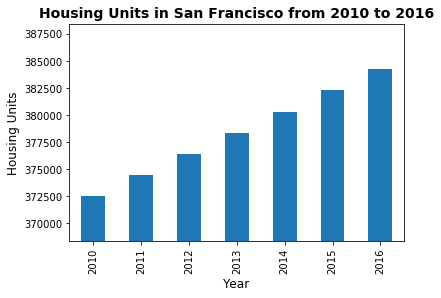

In [107]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
print(avg_housingUnits,'\n')

std_housingUnits = avg_housingUnits['Housing Units'].std()
std_housingUnits = int(std_housingUnits)
print(f'The standard deviation is {std_housingUnits}. Its type is {type(std_housingUnits)}\n')

min_housingUnits = avg_housingUnits['Housing Units'].min()
print(f'The min is {min_housingUnits}. Its type is {type(min_housingUnits)}\n')

max_housingUnits = avg_housingUnits['Housing Units'].max()
print(f'The max is {max_housingUnits}. Its type is {type(max_housingUnits)}\n')

min = min_housingUnits - std_housingUnits
max = max_housingUnits + std_housingUnits

scaled_avg_housingUnits = avg_housingUnits.plot(kind='bar', legend=False)

## Used the shorter methods for practice
plt.xlabel('Year', fontsize=12)
plt.ylabel('Housing Units', fontsize=12)
plt.title('Housing Units in San Francisco from 2010 to 2016', fontsize=14, fontweight='bold')
plt.ylim(min, max)

scaled_avg_housingUnits

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [84]:
# Calculate the average sale price per square foot and average gross rent
avg_salePrice_per_year = sfo_data.groupby('Year')['Sale Price/SqFt']\
                                 .mean()\
                                 .to_frame()\
                                 .astype(int)
avg_salePrice_per_year.rename(columns={'Sale Price/SqFt':'Avg. Sale Price/SqFt'}, inplace=True)
print(type(avg_salePrice_per_year),'\n')

avg_salePrice_per_year

<class 'pandas.core.frame.DataFrame'> 



,Avg. Sale Price/SqFt
Year,
2010,368
2011,341
2012,398
2013,474
2014,555
2015,599
2016,682


In [85]:
avg_grossRent_per_year = sfo_data.groupby('Year')['Gross Rent'].mean().to_frame()
avg_grossRent_per_year.rename(columns={'Gross Rent':'Avg. Gross Rent'},inplace=True)
print(type(avg_grossRent_per_year))

avg_grossRent_per_year

<class 'pandas.core.frame.DataFrame'>


,Avg. Gross Rent
Year,
2010,1239
2011,1530
2012,2324
2013,2971
2014,3528
2015,3739
2016,4390


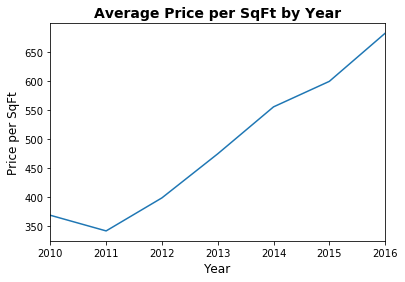

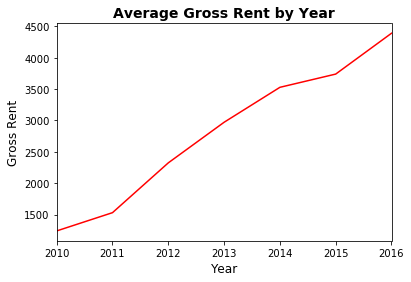

In [86]:
# Create two line charts, one to plot the average sale price per square foot and another for average gross rent

# Line chart for average sale price per square foot
plot_avg_salePrice = avg_salePrice_per_year.plot(legend=False)
plot_avg_salePrice.set_xlabel('Year', fontsize=12)
plot_avg_salePrice.set_ylabel('Price per SqFt', fontsize=12)
plot_avg_salePrice.set_title('Average Price per SqFt by Year', fontsize=14, fontweight='bold')
plot_avg_salePrice = plot_avg_salePrice.figure

# Line chart for average gross rent
plot_avg_grossRent = avg_grossRent_per_year.plot(legend=False, color='red')
plot_avg_grossRent.set_xlabel('Year', fontsize=12)
plot_avg_grossRent.set_ylabel('Gross Rent', fontsize=12)
plot_avg_grossRent.set_title('Average Gross Rent by Year', fontsize=14, fontweight='bold')
plot_avg_grossRent = plot_avg_grossRent.figure

plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [87]:
# Group by year and neighborhood and then create a new dataframe of the mean values
print(sfo_data.head(),'\n')
print(type(sfo_data.groupby(['Year','Neighborhood'])))

sfo_neighborhood = sfo_data.groupby(['Year','Neighborhood']).apply(lambda x: x)
print(type(sfo_neighborhood))

sfo_neighborhood.head()

          Neighborhood  Sale Price/SqFt  Housing Units  Gross Rent
Year                                                              
2010      Alamo Square              291         372560        1239
2010        Anza Vista              267         372560        1239
2010           Bayview              170         372560        1239
2010  Buena Vista Park              347         372560        1239
2010  Central Richmond              319         372560        1239 

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


,Neighborhood,Sale Price/SqFt,Housing Units,Gross Rent
Year,,,,
2010,Alamo Square,291,372560,1239
2010,Anza Vista,267,372560,1239
2010,Bayview,170,372560,1239
2010,Buena Vista Park,347,372560,1239
2010,Central Richmond,319,372560,1239


In [88]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sale_price_by_neighborhood = sfo_neighborhood.rename(columns={'Sale Price/SqFt':'Avg. Sale Price/SqFt'}).groupby(['Year','Neighborhood'])['Avg. Sale Price/SqFt'].mean().to_frame()
print(sale_price_by_neighborhood, type(sale_price_by_neighborhood))

plot_sale_price_by_neighborhood = sale_price_by_neighborhood.hvplot(
    x='Year',
    y='Avg. Sale Price/SqFt',
    ylabel='Avg. Sale Price per Square Foot',
    groupby='Neighborhood',
    dynamic=False
    )
plot_sale_price_by_neighborhood

                             Avg. Sale Price/SqFt
Year Neighborhood                                
2010 Alamo Square                             291
     Anza Vista                               267
     Bayview                                  170
     Buena Vista Park                         347
     Central Richmond                         319
...                                           ...
2016 Telegraph Hill                           903
     Twin Peaks                               970
     Van Ness/ Civic Center                   552
     Visitacion Valley                        328
     Westwood Park                            631

[397 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>


:HoloMap   [Neighborhood]
   :Curve   [Year]   (Avg. Sale Price/SqFt)

In [89]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

rent_by_neighborhood = sfo_neighborhood.rename(columns={'Gross Rent':'Avg. Gross Rent'}).groupby(['Year','Neighborhood'])['Avg. Gross Rent'].mean().to_frame()
print(rent_by_neighborhood, type(rent_by_neighborhood))

plot_rent_by_neighborhood = rent_by_neighborhood.hvplot(
    x='Year',
    y='Avg. Gross Rent',
    ylabel='Avg. Gross Rent per Year',
    groupby='Neighborhood',
    dynamic=False
)
plot_rent_by_neighborhood

                             Avg. Gross Rent
Year Neighborhood                           
2010 Alamo Square                       1239
     Anza Vista                         1239
     Bayview                            1239
     Buena Vista Park                   1239
     Central Richmond                   1239
...                                      ...
2016 Telegraph Hill                     4390
     Twin Peaks                         4390
     Van Ness/ Civic Center             4390
     Visitacion Valley                  4390
     Westwood Park                      4390

[397 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>


:HoloMap   [Neighborhood]
   :Curve   [Year]   (Avg. Gross Rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [90]:
# Getting the data from the top 10 expensive neighborhoods to own
top10_neighborhoods = sfo_data.groupby('Neighborhood')['Sale Price/SqFt']\
                              .mean()\
                              .astype(int)\
                              .to_frame()\
                              .rename(columns={'Sale Price/SqFt':'Avg. Sale Price/SqFt'})\
                              .sort_values('Avg. Sale Price/SqFt',ascending=False)\
                              .head(10)
print(top10_neighborhoods)

plot_top10_neighborhoods = top10_neighborhoods.hvplot.bar(
    x='Neighborhood',
    ylabel='Avg. Sale Price per Square Foot',
    rot=90,
    title='Top 10 Expensive Neighborhoods in SFO',
    width=700,
    height=400,
    color='blue'
)
plot_top10_neighborhoods


                               Avg. Sale Price/SqFt
Neighborhood                                       
Union Square District                           903
Merced Heights                                  788
Miraloma Park                                   779
Pacific Heights                                 689
Westwood Park                                   686
Telegraph Hill                                  676
Cow Hollow                                      665
Potrero Hill                                    661
South Beach                                     649
Eureka Valley/Dolores Heights                   641


:Bars   [Neighborhood]   (Avg. Sale Price/SqFt)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [91]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_neighborhood

,Neighborhood,Sale Price/SqFt,Housing Units,Gross Rent
Year,,,,
2010,Alamo Square,291,372560,1239
2010,Anza Vista,267,372560,1239
2010,Bayview,170,372560,1239
2010,Buena Vista Park,347,372560,1239
2010,Central Richmond,319,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903,384242,4390
2016,Twin Peaks,970,384242,4390
2016,Van Ness/ Civic Center,552,384242,4390


In [92]:
# Plotting the data from the top 10 expensive neighborhood
## The image in the READ_ME showed all neighborhoods plotted, so I plotted it similarly here, with the top 10 after

plot_compare_neighborhoods_rent_sales = sfo_neighborhood.hvplot.bar(
    dynamic=False,
    height=400,
    width=700,
    title='Top 10 Expensive Neighborhoods in SFO',
    x='Year',
    xlabel='Neighborhood',
    y=['Gross Rent','Sale Price/SqFt'],
    ylabel='Num. Housing Units',
    groupby='Neighborhood',
    rot=90,
    bar_width=.7).opts(
        padding=(0,.2),
        ylim=(0,4800),
        fontsize={
            'title':10,
            'xlabel':8
        },
    )
    
plot_compare_neighborhoods_rent_sales

:HoloMap   [Neighborhood]
   :Bars   [Year,Variable]   (value)

In [93]:
## Here's a comparison of only the top 10 most expensive neighborhoods

top10_comparison = sfo_neighborhood.sort_values('Sale Price/SqFt',ascending=False).head(10)
plot_top10_comparison = top10_comparison.hvplot.bar(
    dynamic=False,
    height=400,
    width=700,
    title='Top 10 Expensive Neighborhoods in SFO',
    x='Year',
    xlabel='Neighborhood',
    y=['Gross Rent','Sale Price/SqFt'],
    ylabel='Num. Housing Units',
    groupby='Neighborhood',
    rot=90,
    bar_width=.7).opts(
        padding=(0,.2),
        ylim=(0,4800),
        fontsize={
            'title':10,
            'xlabel':8
        },
    )
    
plot_top10_comparison

:HoloMap   [Neighborhood]
   :Bars   [Year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [94]:
# Load neighborhoods coordinates data
path_coord = Path('Data/neighborhoods_coordinates.csv')
df_coord = pd.read_csv(path_coord, index_col='Neighborhood')

df_coord

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [95]:
#print(sfo_data)
# Calculate the mean values for each neighborhood
#avgs_neighborhood = sfo_data.reset_index().set_index('Year','Neighborhood').drop(columns='Year')
#avgs_neighborhood = avgs_neighborhood.groupby('Neighborhood').mean().round(2)
#avgs_neighborhood = sfo_data.groupby('Neighborhood').mean().round(2)

#avgs_neighborhood = avgs_neighborhood.set_index('Neighborhood')
#avgs_neighborhood = round(avgs_neighborhood['Sale Price/SqFt'])

#avgs_neighborhood = avgs_neighborhood.groupby('Neighborhood').mean().drop(columns='Year')
print(sfo_neighborhood)
avgs_neighborhood = sfo_neighborhood.reset_index().groupby('Neighborhood')[['Sale Price/SqFt','Housing Units','Gross Rent']].mean().astype(int)

avgs_neighborhood

                Neighborhood  Sale Price/SqFt  Housing Units  Gross Rent
Year                                                                    
2010            Alamo Square              291         372560        1239
2010              Anza Vista              267         372560        1239
2010                 Bayview              170         372560        1239
2010        Buena Vista Park              347         372560        1239
2010        Central Richmond              319         372560        1239
...                      ...              ...            ...         ...
2016          Telegraph Hill              903         384242        4390
2016              Twin Peaks              970         384242        4390
2016  Van Ness/ Civic Center              552         384242        4390
2016       Visitacion Valley              328         384242        4390
2016           Westwood Park              631         384242        4390

[397 rows x 4 columns]


,Sale Price/SqFt,Housing Units,Gross Rent
Neighborhood,,,
Alamo Square,365,378401,2817
Anza Vista,372,379050,3031
Bayview,204,376454,2318
Bayview Heights,590,382295,3739
Bernal Heights,576,379374,3080
...,...,...,...
West Portal,498,376940,2515
Western Addition,307,377427,2555
Westwood Highlands,533,376454,2250


In [96]:
# Join the average values with the neighborhood locations
concat_neighborhood = pd.concat([df_coord, avgs_neighborhood], axis='columns', join='inner')
concat_neighborhood = concat_neighborhood.reset_index()

concat_neighborhood

,Neighborhood,Lat,Lon,Sale Price/SqFt,Housing Units,Gross Rent
0,Alamo Square,37.791012,-122.402100,365,378401,2817
1,Anza Vista,37.779598,-122.443451,372,379050,3031
2,Bayview,37.734670,-122.401060,204,376454,2318
3,Bayview Heights,37.728740,-122.410980,590,382295,3739
4,Buena Vista Park,37.768160,-122.439330,452,378076,2698
...,...,...,...,...,...,...
64,West Portal,37.740260,-122.463880,498,376940,2515
65,Western Addition,37.792980,-122.435790,307,377427,2555
66,Westwood Highlands,37.734700,-122.456854,533,376454,2250
67,Westwood Park,37.734150,-122.457000,686,382295,3959


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [109]:

# Set the mapbox access token
load_dotenv('token.env')
map_box_api = os.getenv('mapbox')
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
plot_map_neighborhood = px.scatter_mapbox(
    concat_neighborhood,
    lat='Lat',
    lon='Lon',
    color='Neighborhood'
)

plot_map_neighborhood

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [98]:
## Tested other methods of getting the most expensive Neighborhoods per Year
## Used a thread on .nlargest() in stackoverflow as a resource
## https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups

#df_most_expensive_by_year = sfo_neighborhood[sfo_neighborhood.sort_values('Sale Price/SqFt')]

#sfo = sfo_neighborhood.reset_index().groupby(['Year','Neighborhood'])['Sale Price/SqFt'].nlargest(10).to_frame()

#sfo = sfo.apply(lambda x: x.sort_values(ascending=False).head(5))

sfo = sfo_neighborhood.groupby(['Year','Neighborhood']).agg({'Sale Price/SqFt':sum})
sfo = sfo['Sale Price/SqFt'].astype(int).groupby('Year', group_keys=False)

sfo = sfo.nlargest(10).to_frame()

sfo

Sale Price/SqFt
Year Neighborhood                                  
2010 South Beach                               1037
     Glen Park                                  715
     Miraloma Park                              680
     Cow Hollow                                 569
     Union Square District                      569
...                                             ...
2016 Eureka Valley/Dolores Heights             1026
     Russian Hill                              1024
     Pacific Heights                            996
     Bernal Heights                             986
     Twin Peaks                                 970

[70 rows x 1 columns]

In [99]:
## More testing

sfo2 = sfo_neighborhood.groupby(['Year','Neighborhood'], group_keys=False).mean().nlargest(5, columns='Sale Price/SqFt')#.round(2).to_frame()

sfo2

Sale Price/SqFt  Housing Units  Gross Rent
Year Neighborhood                                                     
2015 Union Square District             2258         382295        3739
2016 Presidio Heights                  1465         384242        4390
     Merced Heights                    1416         384242        4390
2013 Union Square District             1290         378401        2971
2014 Miraloma Park                     1267         380348        3528

In [100]:
sfo_neighborhood

,Neighborhood,Sale Price/SqFt,Housing Units,Gross Rent
Year,,,,
2010,Alamo Square,291,372560,1239
2010,Anza Vista,267,372560,1239
2010,Bayview,170,372560,1239
2010,Buena Vista Park,347,372560,1239
2010,Central Richmond,319,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903,384242,4390
2016,Twin Peaks,970,384242,4390
2016,Van Ness/ Civic Center,552,384242,4390


In [101]:
# Fetch the data from all expensive neighborhoods per year.

df_top10 = sfo_neighborhood.reset_index()\
                     .groupby('Neighborhood')['Sale Price/SqFt','Housing Units','Gross Rent']\
                     .mean()\
                     .astype(int)

df_top10 = df_top10.nlargest(10, columns='Sale Price/SqFt').reset_index()

df_top10

,Neighborhood,Sale Price/SqFt,Housing Units,Gross Rent
0,Union Square District,903,377427,2555
1,Merced Heights,788,380348,3414
2,Miraloma Park,779,375967,2155
3,Pacific Heights,689,378401,2817
4,Westwood Park,686,382295,3959
5,Telegraph Hill,676,378401,2817
6,Cow Hollow,665,378401,2817
7,Potrero Hill,661,378401,2817
8,South Beach,649,375805,2099
9,Eureka Valley/Dolores Heights,641,378401,2817


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [102]:
# Parallel Categories Plot
plot_parallel_categories = px.parallel_categories(
    df_top10,
    dimensions=['Neighborhood','Sale Price/SqFt','Housing Units','Gross Rent'],
    color='Sale Price/SqFt',
    color_continuous_scale='Inferno'
)
plot_parallel_categories

In [103]:
# Parallel Coordinates Plot
plot_parallel_coordinates = px.parallel_coordinates(
    df_top10,
    dimensions=['Neighborhood','Sale Price/SqFt','Housing Units','Gross Rent'],
    color='Sale Price/SqFt'
)
plot_parallel_coordinates

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [104]:
# Sunburst Plot

#df_expensive_neighborhoods_per_year = salePrice_neighborhood

#df_expensive_neighborhoods_per_year = df_expensive_neighborhoods[df_expensive_neighborhoods['Neighborhood']].isin(sfo_data['Neighborhood'])

# df_expensive_neighborhoods_per_year = df_costs[df_costs['neighborhood'].isin(df_expensive_neighborhoods['neighborhood'])]
# df_expensive_neighborhoods_per_year.head()


# top10 = top10_neighborhoods.rename(columns={'Avg. Sale Price/SqFt':'Sale Price/SqFt'})#.reset_index()
# sale = sfo_neighborhood#.reset_index()
# print(top10)
# print(top10.index)
# print(sale)
# print(sale.index)
# df = top10[top10['Neighborhood']].isin(sale['Neighborhood'])
# df


# df_top10 = sfo_neighborhood.reset_index()\
#                      .groupby('Neighborhood')['Sale Price/SqFt','Housing Units','Gross Rent']\
#                      .mean()\
#                      .astype(int)

# df_top10 = df_top10.nlargest(10, columns='Sale Price/SqFt').reset_index()


# df_top10_per_year = sfo_neighborhood.reset_index()\
#                                     .groupby(['Year','Neighborhood'])[
#                                         'Sale Price/SqFt',
#                                         'Housing Units',
#                                         'Gross Rent']\
#                                     .mean()\
#                                     .astype(int)\
#                                     #.nlargest(10, columns='Sale Price/SqFt')

# print(df_top10_per_year)

# print(sfo_neighborhood)
# print(df_top10)
# sfo_neighborhood2 = sfo_neighborhood.reset_index().dropna()
# df_top102 = df_top10.reset_index().drop('index', axis='columns').dropna()
# print(sfo_neighborhood2)
# print(df_top102)
# sunburst = avg_salePrice_per_year[avg_salePrice_per_year['Neighborhood'].isin(top10_neighboorhoods['Neighborhood'])]
# sunburst = sfo_neighborhood2[sfo_neighborhood2.isin(df_top102)]
# sunburst = df_top102[df_top102.isin(sfo_neighborhood2)]

# plot_sunburst = df_top10[df_top10['Neighborhood'].isin(plot_sunburst['Neighborhood'])]
# print(plot_sunburst.head(10))

print(df_top10['Neighborhood'])
sunburst = sfo_neighborhood[sfo_neighborhood['Neighborhood'].isin(df_top10['Neighborhood'])].reset_index()
print(sunburst)

plot_sunburst = px.sunburst(
    sunburst,
    path=['Year','Neighborhood'],
    values='Sale Price/SqFt',
    color='Gross Rent',
    color_continuous_scale='Blues',
    title='Cost Analysis of Most Expensive Neighborhoods in San Francisco per Year',
    height=700
)
plot_sunburst

0            Union Square District
1                   Merced Heights
2                    Miraloma Park
3                  Pacific Heights
4                    Westwood Park
5                   Telegraph Hill
6                       Cow Hollow
7                     Potrero Hill
8                      South Beach
9    Eureka Valley/Dolores Heights
Name: Neighborhood, dtype: object
    Year                   Neighborhood  Sale Price/SqFt  Housing Units  \
0   2010                     Cow Hollow              569         372560   
1   2010  Eureka Valley/Dolores Heights              403         372560   
2   2010                  Miraloma Park              680         372560   
3   2010                Pacific Heights              496         372560   
4   2010                   Potrero Hill              491         372560   
5   2010                    South Beach             1037         372560   
6   2010                 Telegraph Hill              524         372560   
7   2010        